In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [8]:
buildings_gpkg_path = "output/buildings_mhi.gpkg"
urban_areas_gpkg_path = "data/urban_areas_clean.gpkg"

#census:
male_65plus_path= "data/census/male_51_58.gpkg"
female_65plus_path= "data/census/female_51_58.gpkg"
population_households_2022_path= "data/census/populacao_domicilio_census_2022.gpkg"
population_households_2010_path="data/census/population_2010.gpkg"
#census_additional
household_size_variancy_path="data/census/household_size_and_variancy.gpkg"
water_trees_path="data/census/entorno01_water_trees.gpkg"
inadequate_housing_path="data/census/entorno02_inadequada_moradia.gpkg"


merged_matches = gpd.read_file(buildings_gpkg_path)
urban_areas=gpd.read_file(urban_areas_gpkg_path)

male_65plus = gpd.read_file(male_65plus_path)
female_65plus = gpd.read_file(female_65plus_path)
population_households_2022= gpd.read_file(population_households_2022_path)
population_households_2010=gpd.read_file(population_households_2010_path)
household_size_2010=gpd.read_file(household_size_variancy_path)

In [9]:
urban_areas.to_crs(epsg=3857,inplace=True)

male_65plus.to_crs(epsg=3857,inplace=True)
female_65plus.to_crs(epsg=3857,inplace=True)
population_households_2022.to_crs(epsg=3857,inplace=True)
household_size_2010.to_crs(epsg=3857,inplace=True)

In [10]:

merged_matches.drop(columns=['index_right'],inplace=True)

In [11]:
household_size_2010=household_size_2010.rename(columns={'Basico_V001': 'houses_total',
                                                       'Basico_V002':'population',
                                                       'Basico_V003':'household_size',
                                                       'Basico_V004':'var_household_size'})

In [12]:
male_65plus=male_65plus.rename(columns={'Categoria': 'male_65plus'})
female_65plus=female_65plus.rename(columns={'Categoria': 'female_65plus'})

In [13]:
household_size_2010=household_size_2010.loc[:,['ID','CD_GEOCODI','houses_total','population','household_size','var_household_size','geometry']]

In [14]:
male_65plus=male_65plus.loc[:,['ID','male_65plus']]
female_65plus=female_65plus.loc[:,['ID','female_65plus']]

In [15]:
population_households_2022=population_households_2022.loc[:,['CD_SETOR','v0001','v0005','geometry']]

population_households_2022=population_households_2022.rename(columns={'v0001': 'pop_total'})
population_households_2022=population_households_2022.rename(columns={'v0005': 'household_size'})





In [16]:
#household_size_2010['CD_GEOCODI'] = household_size_2010['CD_GEOCODI'].astype(str)
#male_65plus['CD_GEOCODI'] = male_65plus['CD_GEOCODI'].astype(str)
#female_65plus['CD_GEOCODI'] = female_65plus['CD_GEOCODI'].astype(str)

In [17]:
#household_size_2010 = household_size_2010.dropna(subset=['CD_GEOCODI'])
#male_65plus = male_65plus.dropna(subset=['CD_GEOCODI'])
#female_65plus = female_65plus.dropna(subset=['CD_GEOCODI'])

In [18]:
sensitivity = male_65plus.merge(household_size_2010,on='ID', how='left',
                               suffixes=('_left', '_right'))
                               
sensitivity= sensitivity.merge(female_65plus,on='ID', how='left',suffixes=('_left', '_right'))
#sensitivity.drop(['CD_GEOCODI_left','CD_GEOCODI_right'], axis=1)

In [21]:
urban_areas=urban_areas.loc[:,['ID','TIPO','geometry']]

In [7]:
merged_matches['mhi_1'] = pd.to_numeric(merged_matches['mhi_1'], errors='coerce')
merged_matches['mhi_2'] = pd.to_numeric(merged_matches['mhi_2'], errors='coerce')
merged_matches['mhi_3'] = pd.to_numeric(merged_matches['mhi_3'], errors='coerce')

NameError: name 'merged_matches' is not defined

In [159]:
sq3=gpd.sjoin(merged_matches,urban_areas, how='left', predicate='intersects')


In [160]:
mhi_sensitivity=sq3.merge(sensitivity,on='ID', how='left',suffixes=('_left', '_right'))

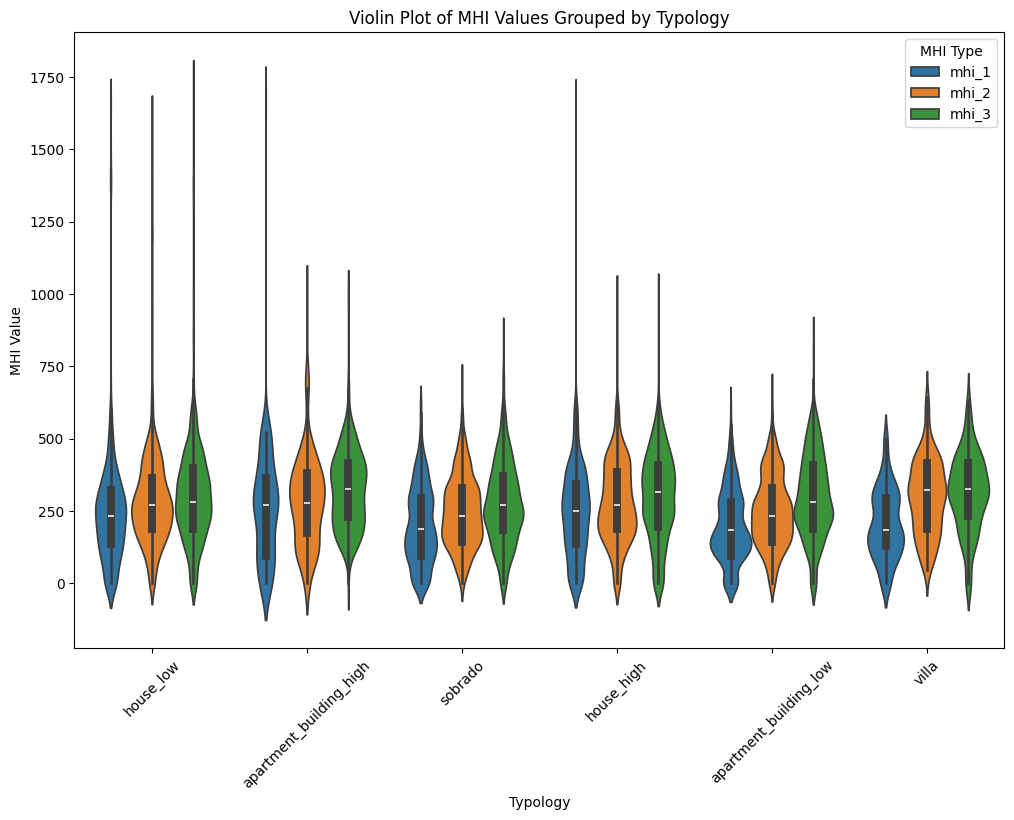

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt



merged_matches['typology'] = merged_matches['typology'].replace('nan', np.nan)
merged_matches.dropna(subset=['typology'],inplace= True)


filtered=merged_matches.loc[merged_matches['tipo']!='favela']
#filtered=merged_matches

# Assuming 'merged_matches' is your GeoDataFrame

# Melt the dataframe to have 'mhi_1', 'mhi_2', 'mhi_3' in a single column
melted_df = filtered.melt(id_vars=['typology'], value_vars=['mhi_1', 'mhi_2', 'mhi_3'],
                                var_name='MHI_Type', value_name='MHI_Value')

# Create a violin plot with all MHI columns on the same plot, grouped by 'typology'
plt.figure(figsize=(12, 8))
sns.violinplot(x='typology', y='MHI_Value', hue='MHI_Type', data=melted_df)
plt.title('Violin Plot of MHI Values Grouped by Typology')
plt.xlabel('Typology')
plt.ylabel('MHI Value')
plt.xticks(rotation=45)
plt.legend(title='MHI Type')
plt.show()

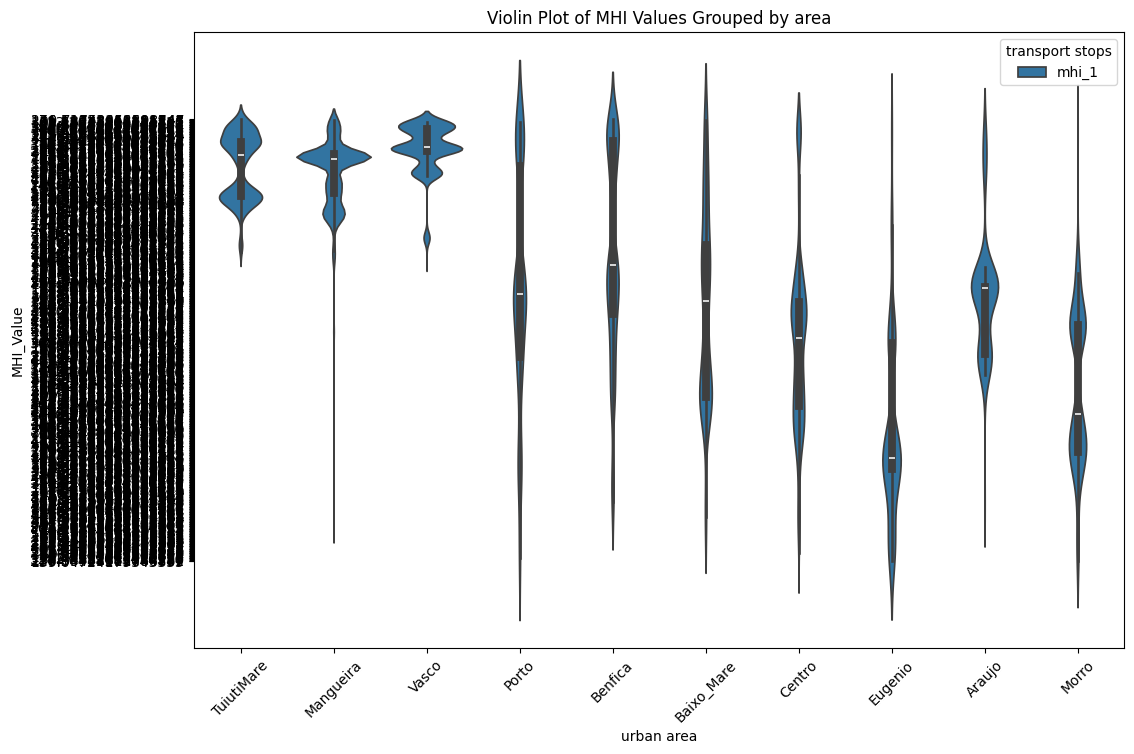

In [169]:

#filtered=merged_matches

# Assuming 'merged_matches' is your GeoDataFrame
filtered=sq3.loc[sq3['TIPO']!='URBANO']
# Melt the dataframe to have 'mhi_1', 'mhi_2', 'mhi_3' in a single column
melted_df = filtered.melt(id_vars=['TIPO'], value_vars=['mhi_1'],
                                var_name='transport_stops', value_name='MHI_Value')

# Create a violin plot with all MHI columns on the same plot, grouped by 'typology'
plt.figure(figsize=(12, 8))
sns.violinplot(x='TIPO', y='MHI_Value', hue='transport_stops', data=melted_df)
plt.title('Violin Plot of MHI Values Grouped by area')
plt.xlabel('urban area')
#plt.ylabel('MHI Value')
plt.xticks(rotation=45)
plt.legend(title='transport stops')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


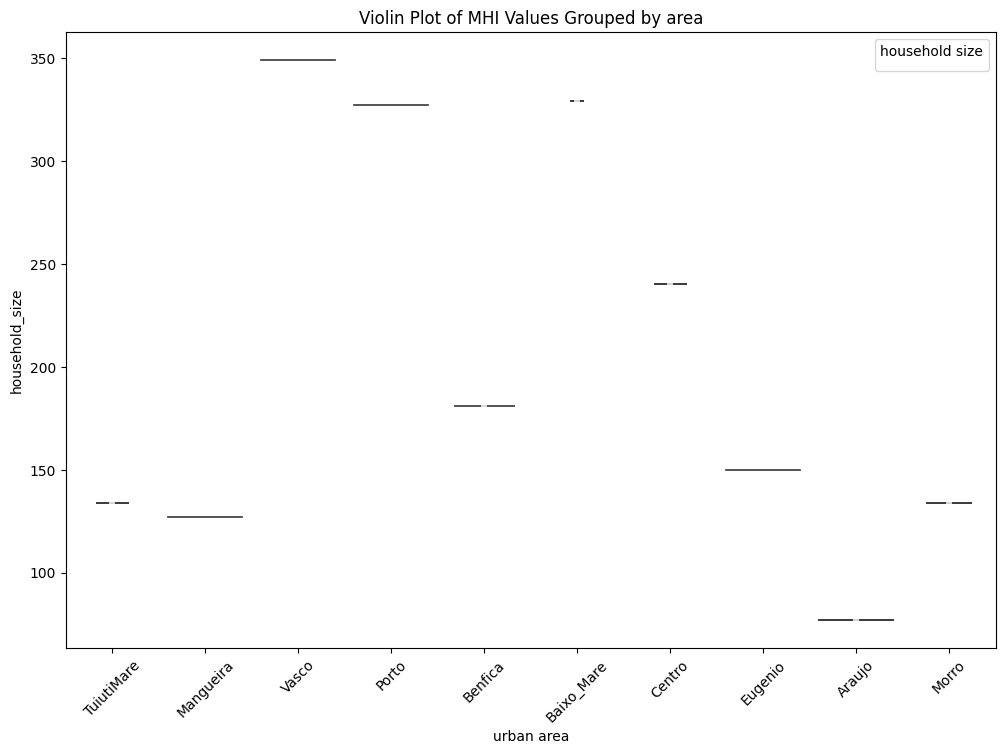

In [171]:
mhi_sensitivity['household_size'] = pd.to_numeric(mhi_sensitivity['household_size'], errors='coerce')
filtered=mhi_sensitivity.loc[mhi_sensitivity['TIPO']!='URBANO']
# Melt the dataframe to have 'mhi_1', 'mhi_2', 'mhi_3' in a single column
#melted_df = filtered.melt(id_vars=['TIPO'], value_vars=['household_size'],
                                #var_name='househould', value_name='household_size')

    
# Create a violin plot with all MHI columns on the same plot, grouped by 'typology'
plt.figure(figsize=(12, 8))
sns.violinplot(x='TIPO', y='household_size', data=filtered)
plt.title('Violin Plot of MHI Values Grouped by area')
plt.xlabel('urban area')
#plt.ylabel('MHI Value')
plt.xticks(rotation=45)
plt.legend(title='household size')
plt.show()

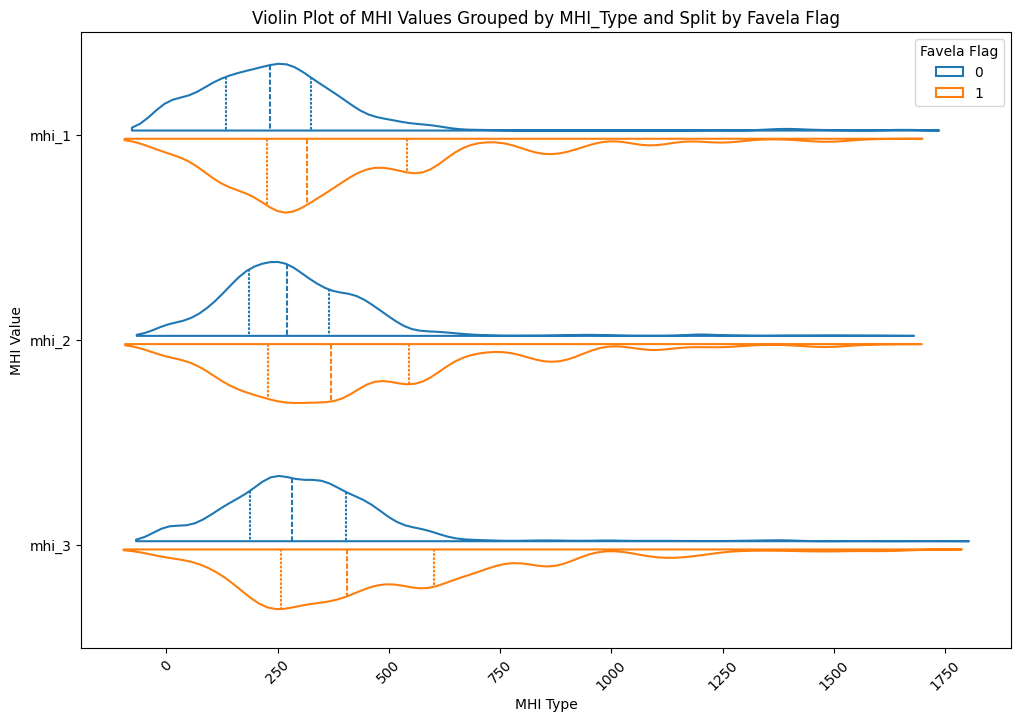

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert MHI columns to numeric
merged_matches['mhi_1'] = pd.to_numeric(merged_matches['mhi_1'], errors='coerce')
merged_matches['mhi_2'] = pd.to_numeric(merged_matches['mhi_2'], errors='coerce')
merged_matches['mhi_3'] = pd.to_numeric(merged_matches['mhi_3'], errors='coerce')

# Replace 'nan' strings with actual NaN values and drop rows with NaN in 'typology'
merged_matches['typology'] = merged_matches['typology'].replace('nan', np.nan)
merged_matches.dropna(subset=['typology'], inplace=True)

# Filter for specific typologies
filtered = merged_matches.loc[merged_matches['typology'].isin(['house_low', 'house_high'])]

# Initialize 'favela_flag' column
filtered.loc[:, 'favela_flag'] = None
filtered.loc[filtered['tipo'] != 'favela', 'favela_flag'] = 0
filtered.loc[filtered['tipo'] == 'favela', 'favela_flag'] = 1

# Melt the dataframe to have 'mhi_1', 'mhi_2', 'mhi_3' in a single column
melted_df = filtered.melt(id_vars=['favela_flag'], value_vars=['mhi_1', 'mhi_2', 'mhi_3'],
                          var_name='MHI_Type', value_name='MHI_Value')

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(y='MHI_Type', x='MHI_Value', hue='favela_flag',
               data=melted_df, split=True,  gap=.1, inner="quart", fill=False)
# Customize the plot
plt.title('Violin Plot of MHI Values Grouped by MHI_Type and Split by Favela Flag')
plt.xlabel('MHI Type')
plt.ylabel('MHI Value')
plt.xticks(rotation=45)
plt.legend(title='Favela Flag', loc='upper right')
plt.show()


In [18]:
import plotly.express as px

# Ensure favela_flag is a string for categorical coloring
melted_df['favela_flag'] = melted_df['favela_flag'].astype(str)
color_map = {'1': 'red','0': 'blue'}

category_order = {'favela_flag': ['0', '1']}
# Create the Plotly Express violin plot with facet_col
fig = px.violin(melted_df, x='MHI_Type', y='MHI_Value', color='favela_flag', 
                box=True, points=False,color_discrete_map=color_map,
                category_orders=category_order)

# Customize the plot to match your previous styling
#fig.update_traces(line_color='black')
fig.update_layout(
    title='Violin Plot of MHI Values Grouped by MHI_Type and Split by Favela Flag',
    xaxis_title='MHI Type',
    yaxis_title='MHI Value',
    legend_title='Favela Flag',
    xaxis_tickangle=45
)

# Display the interactive plot
fig.show()
